# Business case
Build a relevent machine learning model to predict whether the female patient is diabetic or non diabetic.

In [ ]:
# import basic librries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
data.shape
data.columns
data.dtypes
data.info()
data.describe().T

In [ ]:
data.Outcome.unique()

array([1, 0])

In [ ]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# 1 - diabetic /positive class
# 0 - non diabetic /Negative class

In [ ]:
# check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA

<Axes: xlabel='Outcome', ylabel='count'>

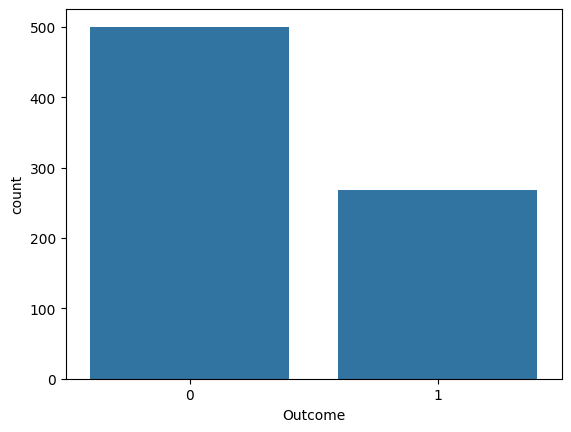

In [ ]:
# univariate
# plot count plot to check whether data is balanced or not
# data is balanced if we have equal observations related to diabetic and non diabetic.
sns.countplot(x=data.Outcome)

<Axes: xlabel='Pregnancies', ylabel='count'>

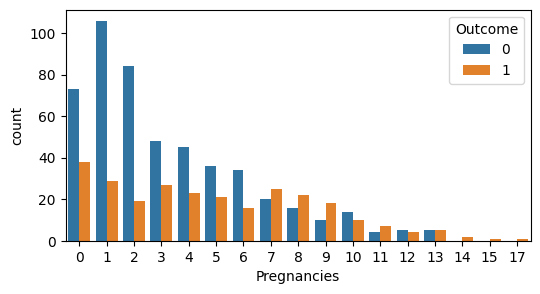

In [ ]:
# It shows that data is imbalanced
plt.figure(figsize=(6,3))
sns.countplot(data=data,x='Pregnancies',hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Count'>

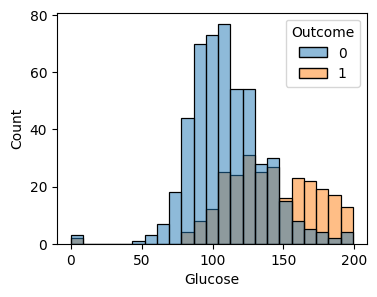

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=data,x='Glucose',hue='Outcome')

<Axes: xlabel='BloodPressure', ylabel='Count'>

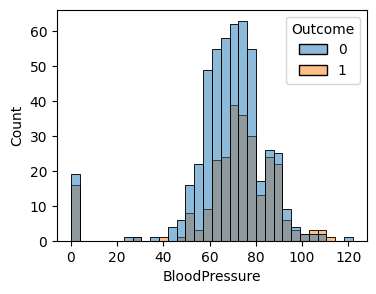

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=data,x='BloodPressure',hue='Outcome')

<Axes: xlabel='Insulin', ylabel='Count'>

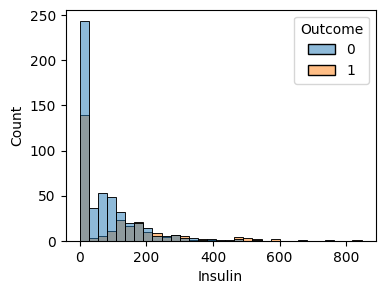

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=data,x='Insulin',hue='Outcome')

<Axes: xlabel='Age', ylabel='Count'>

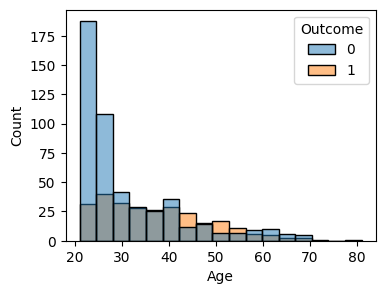

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=data,x='Age',hue='Outcome')

In [ ]:
# split data
x = data.drop('Outcome',axis=1)
y = data.Outcome

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# Model building

In [ ]:
from sklearn.linear_model import LogisticRegression
# initialise the model
model=LogisticRegression()
# train the model
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.coef_

array([[ 0.05654335,  0.0355845 , -0.01087779, -0.00179053, -0.00098901,
         0.10761163,  0.52393657,  0.03582556]])

In [ ]:
model.intercept_

array([-9.39073984])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
model.predict_proba(x_test)

array([[0.73448977, 0.26551023],
       [0.81663378, 0.18336622],
       [0.87880351, 0.12119649],
       [0.84386472, 0.15613528],
       [0.50388802, 0.49611198],
       [0.55417802, 0.44582198],
       [0.98640753, 0.01359247],
       [0.38353902, 0.61646098],
       [0.44359468, 0.55640532],
       [0.20688208, 0.79311792],
       [0.7718873 , 0.2281127 ],
       [0.09960957, 0.90039043],
       [0.61558401, 0.38441599],
       [0.71437859, 0.28562141],
       [0.93046399, 0.06953601],
       [0.6401924 , 0.3598076 ],
       [0.87284487, 0.12715513],
       [0.93133648, 0.06866352],
       [0.14132081, 0.85867919],
       [0.40641766, 0.59358234],
       [0.78804596, 0.21195404],
       [0.92446142, 0.07553858],
       [0.5298674 , 0.4701326 ],
       [0.90654753, 0.09345247],
       [0.45642459, 0.54357541],
       [0.11356335, 0.88643665],
       [0.89170426, 0.10829574],
       [0.96976561, 0.03023439],
       [0.72706997, 0.27293003],
       [0.88597853, 0.11402147],
       [0.